In [1]:
# Import Bloomberg API
#from xbbg import blp

# Import required libraries
import pandas as pd; print (pd.__version__ )
import numpy as np; print (np.__version__ )


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import hashlib
import os

# Import necessary modules
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Keras specific
import tensorflow as tf
print (tf.__version__ )
from tensorflow.keras.models import Sequential,load_model, Model
from tensorflow.keras.layers import SimpleRNN, Bidirectional, BatchNormalization, Embedding, LSTM, Dense, GRU, Conv1D, GlobalMaxPool1D, MaxPool1D, MaxPooling1D, Dropout, Activation , Flatten , Input, concatenate
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras import backend as K
#from tensorflow.keras.losses.Loss import MeanAbsoluteError

2.2.1
1.26.4
2.16.1


In [2]:
from tensorflow.keras import Loss

In [3]:
from tensorflow.keras import losses

In [4]:
from tensorflow.keras.losses import MeanAbsoluteError

In [5]:
from tensorflow.keras.losses import MeanSquaredError

In [6]:
from tensorflow.keras.metrics import MeanSquaredError

In [7]:
from tensorflow.keras.metrics import MeanAbsoluteError

In [8]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv(r"C:\Users\Rishi\Downloads\Bloomberg Project\Nvda 1.csv")

# Display the first few rows of the DataFrame to ensure it is loaded correctly
df.head()

,Dates,PX_LAST,PX_HIGH,PX_LOW,PX_VOLUME,TWITTER_SENTIMENT_DAILY_AVG,TWITTER_NEG_SENTIMENT_COUNT,TWITTER_POS_SENTIMENT_COUNT,TWITTER_NEUTRAL_SENTIMENT_CNT,TWITTER_PUBLICATION_COUNT
0,01-03-2019,31.9975,33.7900,31.9233,70555144,-0.0447,81,52,369,516
1,02-03-2019,34.0475,34.4325,32.4250,58561932,-0.0735,107,30,368,520
2,03-03-2019,35.8500,36.2225,34.1075,70915920,-0.0012,20,12,533,581
3,04-03-2019,34.9575,36.6950,34.2250,78601716,0.0114,71,86,739,929
4,05-03-2019,35.6450,36.1225,34.9650,61725900,-0.0279,102,59,574,755


In [9]:
df['Dates'] = pd.to_datetime(df['Dates'], format='%d-%m-%Y')

In [10]:
df.index = pd.DatetimeIndex(df['Dates'])
df.drop('Dates', axis=1, inplace=True)

In [11]:
df

,PX_LAST,PX_HIGH,PX_LOW,PX_VOLUME,TWITTER_SENTIMENT_DAILY_AVG,TWITTER_NEG_SENTIMENT_COUNT,TWITTER_POS_SENTIMENT_COUNT,TWITTER_NEUTRAL_SENTIMENT_CNT,TWITTER_PUBLICATION_COUNT
Dates,,,,,,,,,
2019-03-01,31.9975,33.7900,31.9233,70555144,-0.0447,81,52,369,516
2019-03-02,34.0475,34.4325,32.4250,58561932,-0.0735,107,30,368,520
2019-03-03,35.8500,36.2225,34.1075,70915920,-0.0012,20,12,533,581
2019-03-04,34.9575,36.6950,34.2250,78601716,0.0114,71,86,739,929
2019-03-05,35.6450,36.1225,34.9650,61725900,-0.0279,102,59,574,755
...,...,...,...,...,...,...,...,...,...
2022-12-22,921.4000,922.2000,890.5500,37620255,0.0384,5,56,248,542
2022-12-23,905.5400,917.8099,890.1100,43734161,0.0490,59,152,620,2484
2022-12-24,904.1200,911.9400,894.2000,32572102,-0.0275,95,84,526,2278


In [12]:
import pandas as pd

def get_technical_indicators(dataset):
    # Ensure 'Dates' is converted to datetime and set as index if not already
    if 'Dates' in dataset.columns:  # Check if 'Dates' is still a column
        dataset['Dates'] = pd.to_datetime(dataset['Dates'], format='%d-%m-%Y')
        dataset.set_index('Dates', inplace=True)
    
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['PX_LAST'].rolling(window=7).mean()
    dataset['ma21'] = dataset['PX_LAST'].rolling(window=21).mean()

    # Create MACD
    dataset['26ema'] = dataset['PX_LAST'].ewm(span=26, adjust=False).mean()
    dataset['12ema'] = dataset['PX_LAST'].ewm(span=12, adjust=False).mean()
    dataset['MACD'] = dataset['12ema'] - dataset['26ema']

    # Create Bollinger Bands
    dataset['20sd'] = dataset['PX_LAST'].rolling(20).std()
    dataset['upper_band'] = dataset['ma21'] + (dataset['20sd'] * 2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['20sd'] * 2)

    # Create Exponential moving average
    dataset['ema'] = dataset['PX_LAST'].ewm(com=0.5, adjust=False).mean()

    # Create Momentum (using a typical period such as 10 days)
    dataset['momentum'] = dataset['PX_LAST'] - dataset['PX_LAST'].shift(10)

    return dataset.fillna(method='bfill')

# Assuming 'df' already has 'Dates' and 'PX_LAST' columns properly formatted
ti_df = get_technical_indicators(df.copy())  # Passing a copy of df
print(ti_df)


             PX_LAST   PX_HIGH    PX_LOW  PX_VOLUME  \
Dates                                                 
2019-03-01   31.9975   33.7900   31.9233   70555144   
2019-03-02   34.0475   34.4325   32.4250   58561932   
2019-03-03   35.8500   36.2225   34.1075   70915920   
2019-03-04   34.9575   36.6950   34.2250   78601716   
2019-03-05   35.6450   36.1225   34.9650   61725900   
...              ...       ...       ...        ...   
2022-12-22  921.4000  922.2000  890.5500   37620255   
2022-12-23  905.5400  917.8099  890.1100   43734161   
2022-12-24  904.1200  911.9400  894.2000   32572102   
2022-12-25  887.4700  910.7200  882.3100   37801268   
2022-12-26  898.7800  914.0100  892.2700   33460852   

            TWITTER_SENTIMENT_DAILY_AVG  TWITTER_NEG_SENTIMENT_COUNT  \
Dates                                                                  
2019-03-01                      -0.0447                           81   
2019-03-02                      -0.0735                          107

C:\Users\Rishi\AppData\Local\Temp\ipykernel_10528\2670793684.py:29: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return dataset.fillna(method='bfill')


In [13]:
target_column = ['PX_LAST']
predictors = list(set(list(ti_df.columns))-set(target_column))

scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(ti_df[predictors])
y = scaler.fit_transform(ti_df[target_column])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 123,shuffle=False)    
split_time = X_train.shape[0]

X_train = np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1257, 1, 18) (1257, 1) (140, 1, 18) (140, 1)


In [15]:


def create_lstm(X_train, regress=False):
    model = Sequential()
    model.add(LSTM(units = 32, activation='relu', return_sequences=True, input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 128, return_sequences = True))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 512))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    return model

modelName = r'C:\Users\Rishi\Downloads\Bloomberg Project\LSTM'
modelFilePath = modelName + r'\model.h5'  # Added specific file path with .h5 extension

# Ensure the directory exists
if not os.path.exists(modelName):
    os.makedirs(modelName)

if not os.path.exists(modelFilePath):
    model_lstm = create_lstm(X_train, regress=False)
    #model_lstm = load_model(modelFilePath)
    model_lstm.compile(loss= tf.keras.losses.MeanAbsoluteError(), optimizer='adam')
    history_lstm = model_lstm.fit(X_train, y_train, epochs = 100, batch_size=32, validation_data = (X_test, y_test), shuffle=False)
    scores_lstm = model_lstm.evaluate(X_train, y_train, verbose=0)
    model_lstm.save(modelFilePath)  # Save the whole model to a .h5 file
else:   
    model_lstm = load_model(modelFilePath)
    model_lstm.compile(loss = tf.keras.losses.MeanAbsoluteError(), optimizer = 'adam')
    scores_lstm = model_lstm.evaluate(X_train, y_train, verbose=0)

print(model_lstm.summary())
print('')


D:\projects\test-projects\cuda\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0323 - val_loss: 0.3768
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1361 - val_loss: 0.1015
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1358 - val_loss: 0.0630
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0325 - val_loss: 0.0306
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0781 - val_loss: 0.0684
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0228 - val_loss: 0.0572
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0696 - val_loss: 0.0513
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0164 - val_loss: 0.0756
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0722 - val_loss: 0.0490
Epoch 10/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0220 - val_loss: 0.1309
Epoch 11/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1032 - val_loss: 0.0400
Epoch 12/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 32)               │           6,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 1, 128)              │          82,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 512)                 │       1,312,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,206,725 (16.05 MB)

 Trainable params: 1,402,241 (5.35 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,804,484 (10.70 MB)

None



In [16]:
import os


def create_gru(X_train, regress=False):
    model = Sequential()
    model.add(GRU(units=32, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(GRU(units=128, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(GRU(units=512))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    return model

modelName = r'C:\Users\Rishi\Downloads\Bloomberg Project\GRU'
modelFilePath = modelName + r'\model.h5'
weightsFilePath = modelName + r'\model.weights.h5'

# Ensure the directory exists
if not os.path.exists(modelName):
    os.makedirs(modelName)

if not os.path.exists(modelFilePath):
    model_gru = create_gru(X_train, regress=False)
    model_gru.compile(loss=tf.keras.losses.MeanAbsoluteError(), optimizer='adam')
    history_gru = model_gru.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test), shuffle=False)
    scores_gru = model_gru.evaluate(X_train, y_train, verbose=0)
    model_gru.save(modelFilePath)
    model_gru.save_weights(weightsFilePath)
else:    
    model_gru = load_model(modelFilePath)
    model_gru.load_weights(weightsFilePath)
    model_gru.compile(loss=tf.keras.losses.MeanAbsoluteError(), optimizer='adam')
    scores_gru = model_gru.evaluate(X_train, y_train, verbose=0)

print(model_gru.summary())
print('')


Epoch 1/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0283 - val_loss: 0.3380
Epoch 2/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1187 - val_loss: 0.3786
Epoch 3/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0534 - val_loss: 0.0432
Epoch 4/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0363 - val_loss: 0.1208
Epoch 5/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0205 - val_loss: 0.1747
Epoch 6/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0648 - val_loss: 0.1352
Epoch 7/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0240 - val_loss: 0.3799
Epoch 8/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0935 - val_loss: 0.0539
Epoch 9/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0349 - val_loss: 0.0758
Epoch 10/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0269 - val_loss: 0.2524
Epoch 11/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0939 - val_loss: 0.0214
Epoch 12/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0272 - val_l

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 1, 32)               │           4,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 1, 128)              │          62,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 512)                 │         986,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,161,477 (12.06 MB)

 Trainable params: 1,053,825 (4.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,107,652 (8.04 MB)

None



In [17]:
color1 = "#522dc2"
color2 = "#daeb6c"
color3 = "#c4c4be"

dfname = "Nvidia Corp"

# Data frame for metrics
metricsDF = pd.DataFrame(columns=['MSE', 'MAE'])

#Functions to evaluate results and save metrics
def evalModel(forecast):
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(y_test.values.reshape(-1), forecast)
    mse = mse.result().numpy()
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(y_test.values.reshape(-1), forecast)
    mae = mae.result().numpy()
    return mse, mae

def addMetrics(metricsDF, modelName, forecast):
    metricsDF.loc[modelName] = list(evalModel(forecast))
    return metricsDF

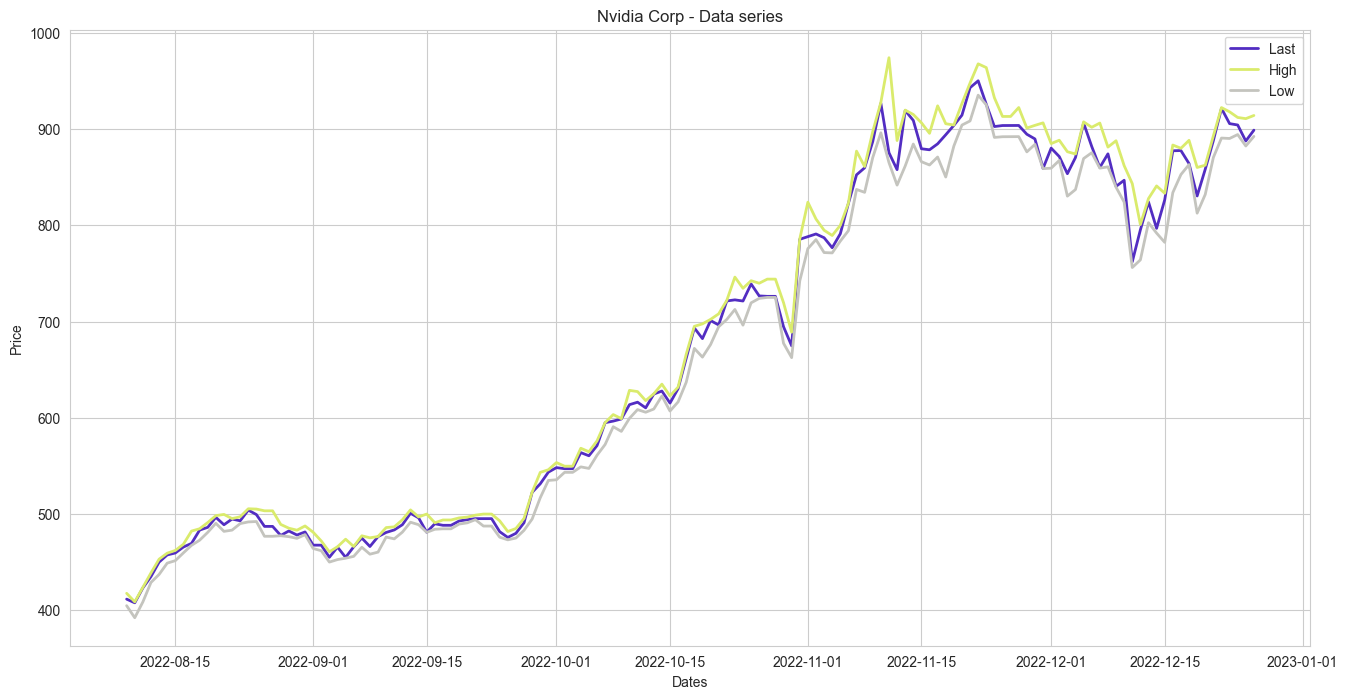

In [18]:

plt.figure(figsize=(16,8))
plt.xlabel('Dates')
plt.ylabel('Price')
plt.plot(df['PX_LAST'][split_time:], lw=2, c=color1)
plt.plot(df['PX_HIGH'][split_time:], lw=2, c=color2)
plt.plot(df['PX_LOW'][split_time:], lw=2, c=color3)
plt.legend(['Last','High', 'Low'])

plt.title(dfname + ' - Data series')
plt.grid(True)
plt.show()

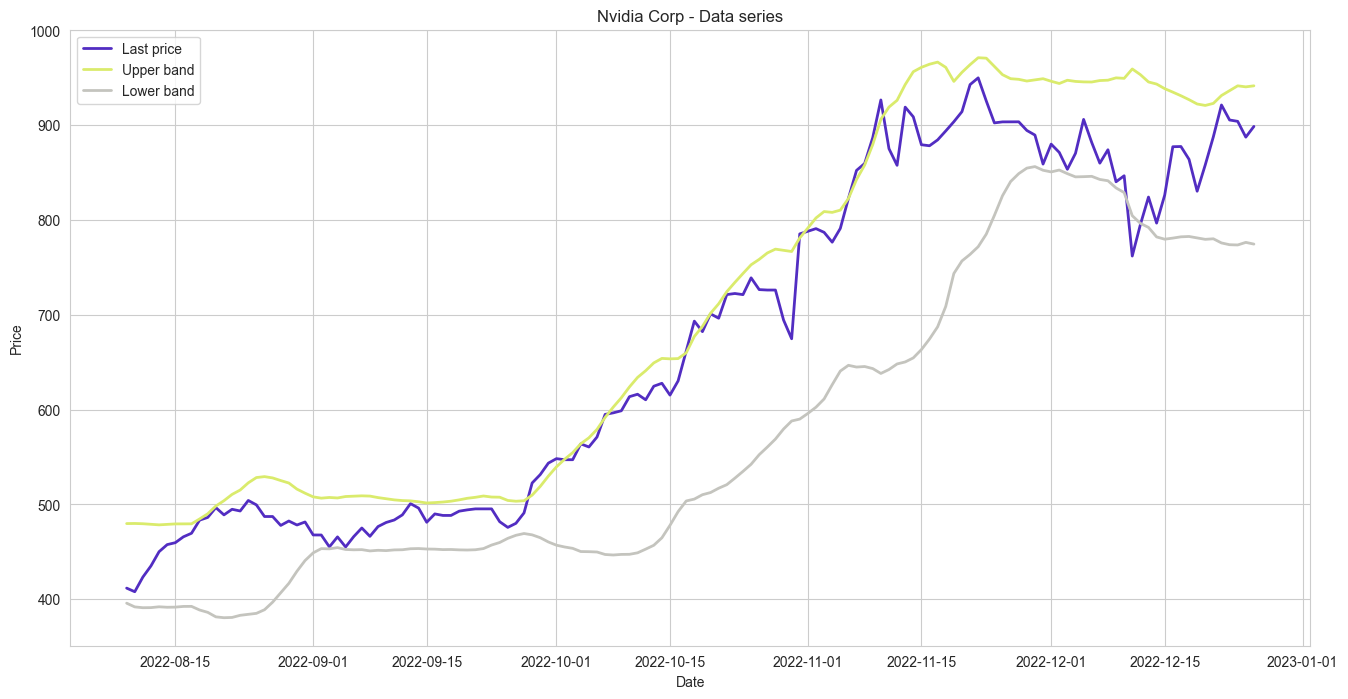

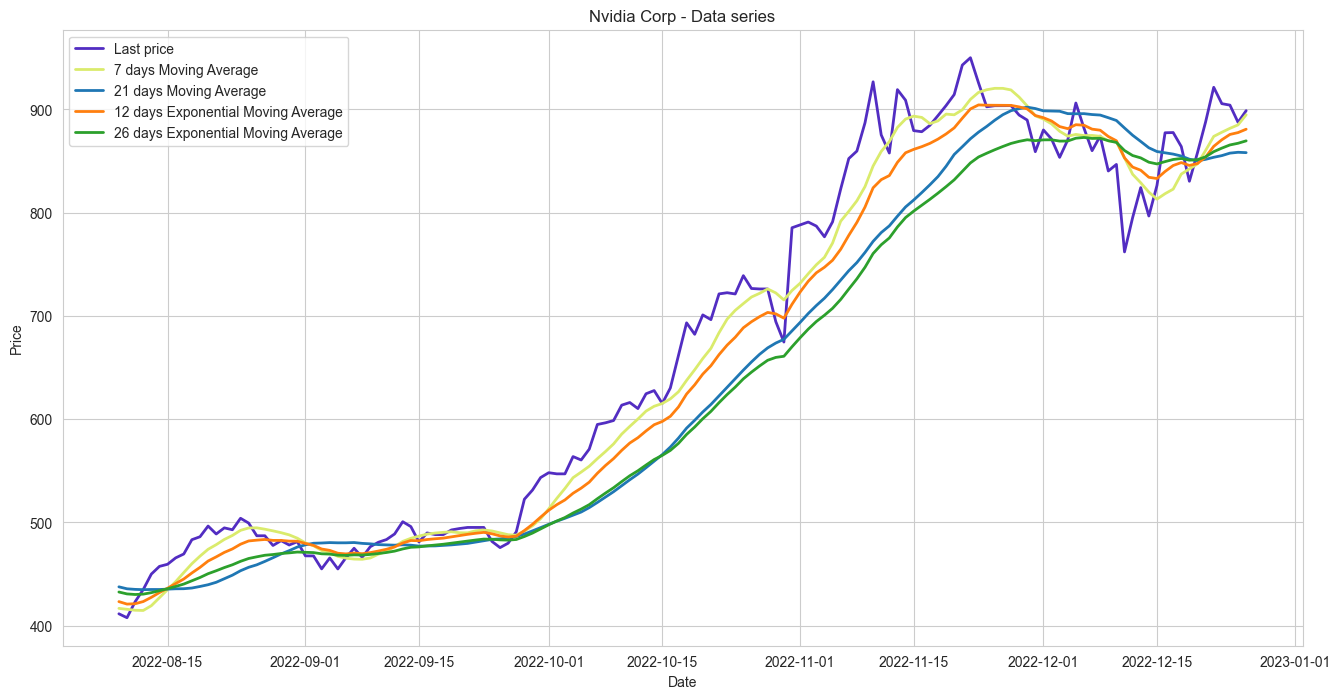

In [19]:
ti_df.sort_index(inplace=True)
plt.figure(figsize=(16,8))
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(ti_df['PX_LAST'][split_time:], lw=2, c=color1)
plt.plot(ti_df['upper_band'][split_time:], lw=2, c=color2)
plt.plot(ti_df['lower_band'][split_time:], lw=2, c=color3)
plt.legend(['Last price','Upper band', 'Lower band'])
plt.title(dfname + ' - Data series')
plt.grid(True)
plt.show()


plt.figure(figsize=(16,8))
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(ti_df['PX_LAST'][split_time:], lw=2, c=color1)
plt.plot(ti_df['ma7'][split_time:], lw=2, c=color2)
plt.plot(ti_df['ma21'][split_time:], lw=2)
plt.plot(ti_df['12ema'][split_time:], lw=2 )
plt.plot(ti_df['26ema'][split_time:], lw=2)

plt.legend(["Last price","7 days Moving Average","21 days Moving Average","12 days Exponential Moving Average", "26 days Exponential Moving Average"])
plt.title(dfname + ' - Data series')
plt.grid(True)
plt.show()

In [20]:
y_test = scaler.inverse_transform(y_test)
y_test = pd.DataFrame(y_test)


In [21]:
addMetrics(metricsDF, "7 days Moving Average", ti_df['ma7'][split_time:].values.reshape(-1))
addMetrics(metricsDF, "21 days Moving Average", ti_df['ma21'][split_time:].values.reshape(-1))
addMetrics(metricsDF, "12 days Exponential Moving Average", ti_df['12ema'][split_time:].values.reshape(-1))
addMetrics(metricsDF, "26 days Exponential Moving Average", ti_df['26ema'][split_time:].values.reshape(-1))
metricsDF

,MSE,MAE
7 days Moving Average,689.049744,20.334091
21 days Moving Average,3038.606689,44.401722
12 days Exponential Moving Average,1115.728516,26.318529
26 days Exponential Moving Average,3451.909668,45.648769


In [22]:
#LSTM

In [23]:
y_predicted_lstm = model_lstm.predict(X_test)
y_predicted_lstm = scaler.inverse_transform(y_predicted_lstm)
y_predicted_lstm = pd.DataFrame(y_predicted_lstm)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


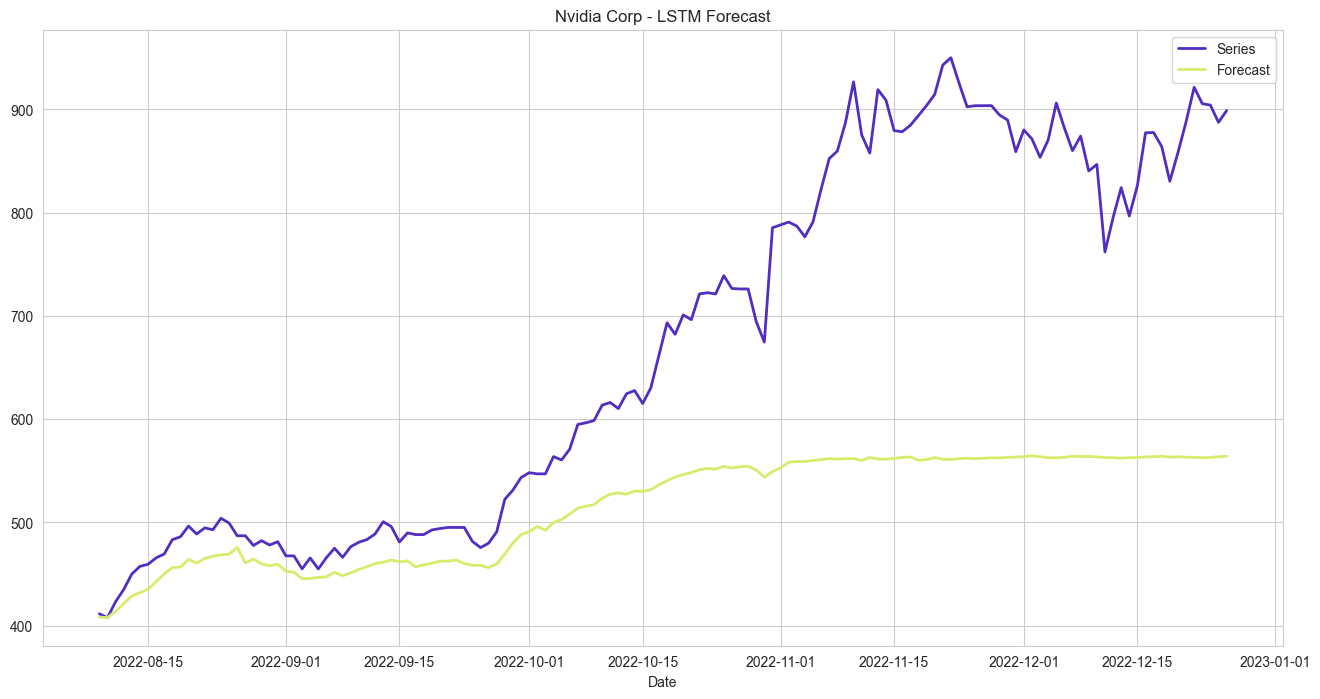

In [24]:
plt.figure(figsize=(16,8))
plt.xlabel('Date')
plt.plot(df['PX_LAST'][split_time:], lw=2, c=color1)
plt.plot(df['PX_LAST'][split_time:].index, y_predicted_lstm, lw=2, c=color2)
plt.legend(['Series', 'Forecast'])
plt.title(dfname+' - LSTM Forecast')
plt.grid(True)
plt.show()


In [25]:
addMetrics(metricsDF, "LSTM prediction",y_predicted_lstm.values.reshape(-1))
metricsDF

,MSE,MAE
7 days Moving Average,689.049744,20.334091
21 days Moving Average,3038.606689,44.401722
12 days Exponential Moving Average,1115.728516,26.318529
26 days Exponential Moving Average,3451.909668,45.648769
LSTM prediction,42328.457031,158.441849


In [26]:
#GRU

In [27]:
y_predicted_gru = model_gru.predict(X_test)
y_predicted_gru = scaler.inverse_transform(y_predicted_gru)
y_predicted_gru = pd.DataFrame(y_predicted_gru)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


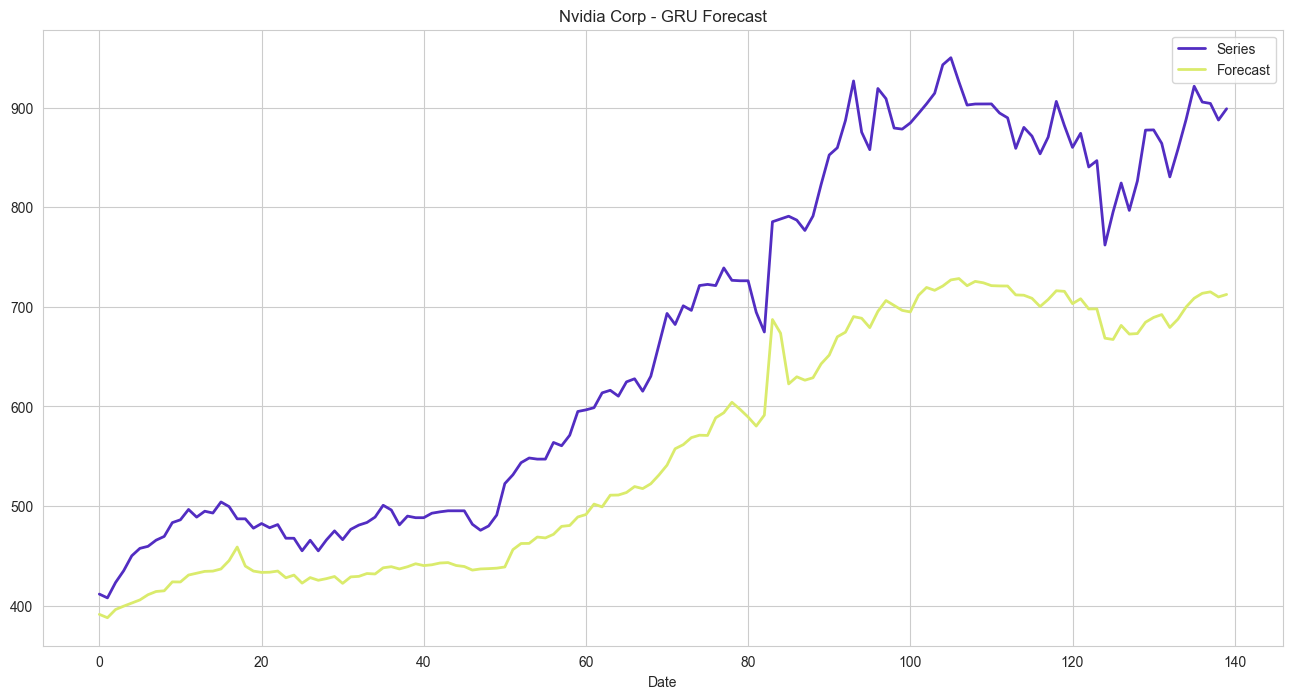

In [28]:
plt.figure(figsize=(16,8))
plt.xlabel('Date')
plt.plot(y_test, lw=2, c=color1)
plt.plot(y_test.index, y_predicted_gru, lw=2, c=color2)
plt.legend(['Series', 'Forecast'])
plt.title(dfname+' - GRU Forecast')
plt.grid(True)
plt.show()


In [29]:
addMetrics(metricsDF, "GRU prediction",y_predicted_gru.values.reshape(-1))
metricsDF

,MSE,MAE
7 days Moving Average,689.049744,20.334091
21 days Moving Average,3038.606689,44.401722
12 days Exponential Moving Average,1115.728516,26.318529
26 days Exponential Moving Average,3451.909668,45.648769
LSTM prediction,42328.457031,158.441849
GRU prediction,16477.177734,113.698868
